In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

##steps of ml  
'''
1 have a dataset
2 tarin teset split of dataset
3 sklearn
'''

'\n1 have a dataset\n2 tarin teset split of dataset\n3 sklearn\n'

In [3]:
##read the dataset
df =pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

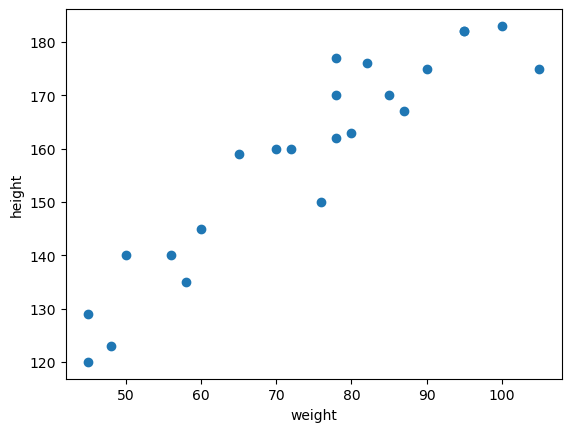

In [4]:
## scatter plot
plt.scatter(df['Weight'],df["Height"])
plt.xlabel("weight")
plt.ylabel("height")

In [5]:
#independent feature and dependent feature
X = df[['Weight']]
y = df['Height']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=123)

In [7]:
##standardize the dataset train independent dat
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
X.shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

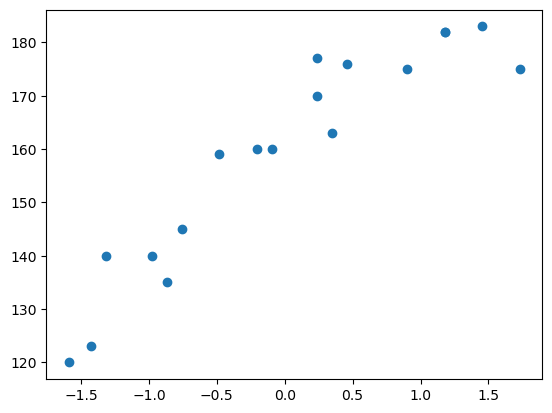

In [9]:
plt.scatter(X_train, y_train)

In [10]:
## train the simple linear Regression model
from sklearn.linear_model import LinearRegression

In [11]:
regressor = LinearRegression()

In [12]:
regressor.fit(X_train,y_train)

LinearRegression()

In [13]:
print("slope of coefficient of weight is: ",regressor.coef_)
print("Intercept",regressor.intercept_)

slope of coefficient of weight is:  [18.6274989]
Intercept 159.16666666666666


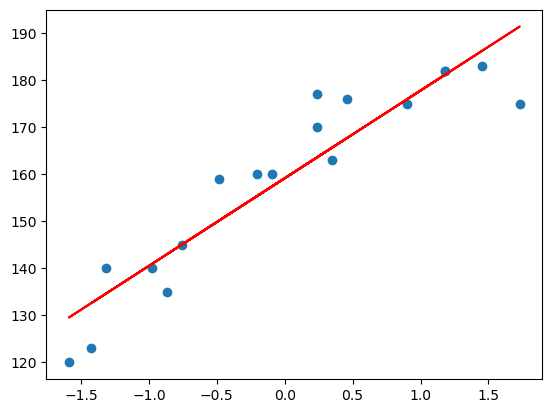

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),"r")

In [19]:
Y_pred_test  = regressor.predict(X_test)

In [20]:
Y_pred_test,y_test

(array([163.57711255, 172.85623245, 129.5536729 , 161.5150859 ,
        170.7942058 ]),
 5     162
 19    167
 20    129
 18    150
 14    170
 Name: Height, dtype: int64)

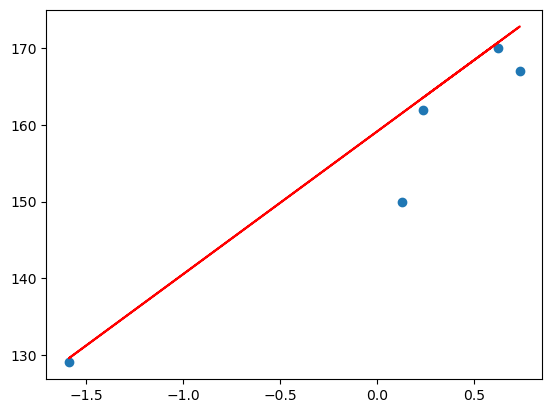

In [21]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),"r")

In [ ]:
##perfermoce metrics

##mse, mae, rmse
#R square and adjusted RSquare

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
mse = mean_squared_error(y_test,Y_pred_test)
mae = mean_absolute_error(y_test,Y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

34.063452466348814
4.059261920745814
5.836390362745522


In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test,Y_pred_test)

In [26]:
score

0.8475498905014822

In [27]:
R2= 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
R2

0.7967331873353096

In [28]:
## new data is 80
scale_weight = scaler.transform([[80]])
scale_weight

c:\Users\eddie\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.34746868]])

In [29]:
regressor.predict(scale_weight)

array([165.63913919])

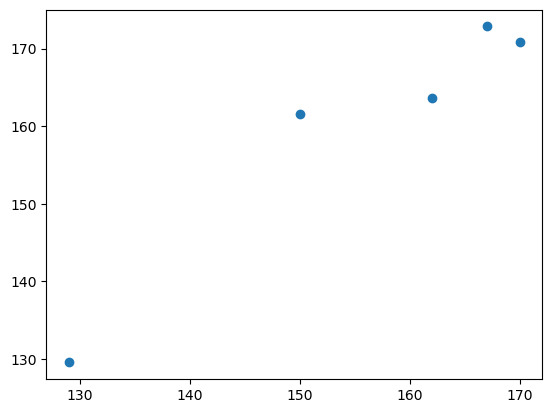

In [30]:
plt.scatter(y_test,Y_pred_test)

In [32]:
residuals=y_test-Y_pred_test
residuals

5     -1.577113
19    -5.856232
20    -0.553673
18   -11.515086
14    -0.794206
Name: Height, dtype: float64

C:\Users\eddie\AppData\Local\Temp\ipykernel_16564\1555645468.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde =True)


<Axes: xlabel='Height', ylabel='Density'>

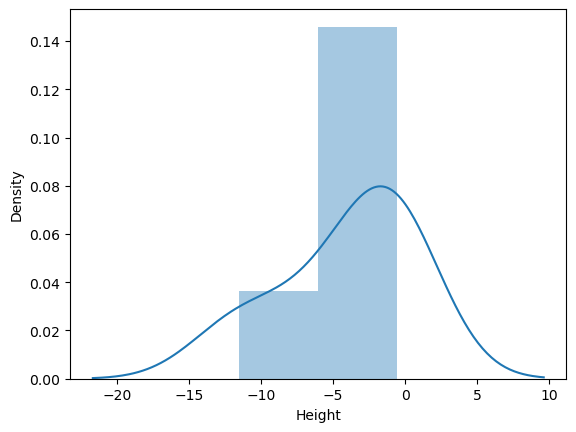

In [33]:
import seaborn as sns
sns.distplot(residuals,kde =True)

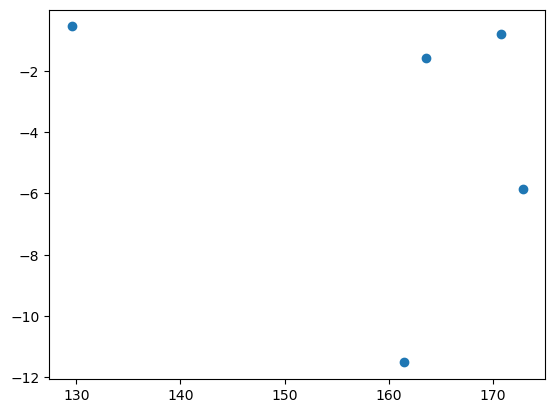

In [35]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(Y_pred_test,residuals)